# **Projeto Final: Introdução à Ciência de Dados**

### **Dupla**: Davi Henrique Menezes da Cruz e Sabrina de Oliveira Souza


### **Tema**: Análise da Distribuição e Prevalência da Síndrome Respiratória Aguda Grave (SRAG) no Brasil: Um Estudo das Diferenças Regionais e do Perfil Demográfico (Sexo e Raça/Cor), 2016-2018


### **Objetivo**: Analisar o perfil demográfico (Sexo e Raça/Cor) e regional (UF) associado à internação em Unidade de Terapia Intensiva (UTI) de pacientes com SRAG, no período de 2016 a 2018, utilizando um modelo de Classificação para determinar a importância relativa das variáveis.

###**Introdução**:
A **Síndrome Respiratória Aguda Grave (SRAG)** representa um desafio contínuo para a saúde pública brasileira, exigindo monitoramento rigoroso e alocação eficiente de recursos hospitalares, como leitos de Unidade de Terapia Intensiva (UTI). A capacidade de prever quais pacientes notificados têm maior probabilidade de evoluir para um quadro grave (necessidade de UTI) é fundamental para otimizar o manejo clínico e salvar vidas.

Este projeto usa a base de dados dos anos 2016 a 2018 com o objetivo de identificar e analisar a influência dos fatores demográficos (idade, sexo, raça/cor) e regionais (UF de residência) na necessidade de internação em UTI.

### **Importação das Bases**:
Foi feito o download das bases de 2016 a 2018 para análise de um recorte do conjunto de dados da SRAG, usando a biblioteca `gdown`.

In [ ]:
!pip install gdown -q
import gdown

# IDs das bases
id_2016 = '1ThvqPg4vGBO6_rODWNj5XneTn_V4pArQ'
id_2017 = '1mCOODvnggumQQqDxGraKj77xzyd3Xq1W'
id_2018 = '15f4cv-z7uo-zK073FKVIOT_yHLj5rclA'

# Download as bases
gdown.download(f'https://drive.google.com/uc?id={id_2016}', 'INFLUD16.csv')
gdown.download(f'https://drive.google.com/uc?id={id_2017}', 'INFLUD17.csv')
gdown.download(f'https://drive.google.com/uc?id={id_2018}', 'INFLUD18.csv')

Downloading...
From: https://drive.google.com/uc?id=1ThvqPg4vGBO6_rODWNj5XneTn_V4pArQ
To: /content/INFLUD16.csv
100%|██████████| 16.7M/16.7M [00:00<00:00, 40.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mCOODvnggumQQqDxGraKj77xzyd3Xq1W
To: /content/INFLUD17.csv
100%|██████████| 9.19M/9.19M [00:00<00:00, 40.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=15f4cv-z7uo-zK073FKVIOT_yHLj5rclA
To: /content/INFLUD18.csv
100%|██████████| 14.7M/14.7M [00:00<00:00, 52.4MB/s]


'INFLUD18.csv'

### **Importação das Bibliotecas**:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Coleta e Organização Inicial dos Dados:**

In [ ]:
# Nomes dos arquivos
arquivos = ['INFLUD16.csv', 'INFLUD17.csv', 'INFLUD18.csv']
anos = [2016, 2017, 2018]
dfs = []

print("Iniciando a concatenação das bases...")

# Loop para carregar cada arquivo e adicionar a coluna 'ANO'
for i, arquivo in enumerate(arquivos):
    df_temp = pd.read_csv(arquivo, sep=';', encoding='latin1', low_memory=False)
    df_temp['ANO'] = anos[i] # Adiciona a coluna do ano
    dfs.append(df_temp)
    print(f"-> Arquivo {arquivo} carregado com {len(df_temp)} linhas.")

# Concatenando todos os DataFrames em um único objeto
df_srag_completo = pd.concat(dfs, ignore_index=True)

print("\nCONCATENAÇÃO CONCLUÍDA:")
print(f"Base Final criada com {df_srag_completo.shape[0]} linhas e {df_srag_completo.shape[1]} colunas.")

Iniciando a concatenação das bases...
-> Arquivo INFLUD16.csv carregado com 54380 linhas.
-> Arquivo INFLUD17.csv carregado com 29551 linhas.
-> Arquivo INFLUD18.csv carregado com 47756 linhas.

CONCATENAÇÃO CONCLUÍDA:
Base Final criada com 131687 linhas e 112 colunas.


**Seleção de Variáveis Relevantes**

In [ ]:
# Mapeamento das colunas originais para os novos nomes
map_colunas = {
    "ID_MUNICIP": "municipio_registro",
    "DT_SIN_PRI": "data_primeiros_sintomas",
    "CS_SEXO": "sexo",
    "CS_RACA": "raca_cor",
    "SG_UF": "uf_residencia",
    "ID_MN_RESI": "municipio_residencia",
    "NU_IDADE_N": "idade",
    "CS_ESCOL_N": "escolaridade",
    "CS_GESTANT": "gestante",
    "HOSPITAL": "hospital",
    "UTI": "uti", # Variável Alvo
    "VACINA": "vacina",
    "EVOLUCAO": "evolucao",
    "OBESIDADE": "obesidade",
    "CARDIOPATI": "cardiopati",
    "PNEUMOPATI": "pneumopati",
    "METABOLICA": "metabolica",
    "FEBRE": "febre",
    "TOSSE": "tosse",
    "DISPNEIA": "dispneia"
    # 'ANO' já está na base e será mantida
}

# Lista das colunas que serão extraídas (incluindo 'ANO')
colunas_para_extrair = list(map_colunas.keys()) + ['ANO']

# Cria o DataFrame de trabalho com as colunas extraídas
df_trabalho = df_srag_completo[colunas_para_extrair].copy()

# Renomeia as colunas
df_trabalho = df_trabalho.rename(columns=map_colunas)

print("SELEÇÃO DE VARIÁVEIS CONCLUÍDA:")
print(f"DataFrame pronto para análise com {df_trabalho.shape[1]} colunas.")
print("Primeiras colunas:", list(df_trabalho.columns[:5]))

SELEÇÃO DE VARIÁVEIS CONCLUÍDA:
DataFrame pronto para análise com 21 colunas.
Primeiras colunas: ['municipio_registro', 'data_primeiros_sintomas', 'sexo', 'raca_cor', 'uf_residencia']


 **Identificação Inicial de Problemas nos Dados**

In [ ]:
# --- Análise de Qualidade de Dados ---

print("--- 3.1. Valores Ausentes (NaN) ---")

# Calculando o total e o percentual de valores ausentes
ausentes = df_trabalho.isnull().sum().sort_values(ascending=False)
percentual_ausente = (ausentes / len(df_trabalho)) * 100

df_ausentes = pd.DataFrame({'Total': ausentes, 'Percentual (%)': percentual_ausente})

# Exibe apenas as colunas com algum valor ausente
print("Colunas com NaN:")
print(df_ausentes[df_ausentes['Total'] > 0])

print("\n--- 3.2. Verificação de Tipos de Dados ---")
# df.info() mostra os tipos e o total de não-nulos para verificar se os tipos estão ok
df_trabalho.info()

print("\n--- 3.3. Inconsistências (Códigos '9' para Ignorado) ---")

# Colunas que usam o padrão 1=Sim, 2=Não, 9=Ignorado
colunas_para_ignorado = ['uti', 'sexo', 'raca_cor', 'gestante', 'obesidade',
                         'cardiopati', 'pneumopati', 'metabolica', 'febre', 'tosse', 'dispneia']

for col in colunas_para_ignorado:
    # Contagem da frequência de cada valor (em percentual)
    if col in df_trabalho.columns:
        contagem_percentual = df_trabalho[col].value_counts(dropna=False, normalize=True) * 100

        # Se existir o código 9.0 (Ignorado), exibe
        if 9.0 in contagem_percentual.index:
             print(f"-> {col}: {contagem_percentual.get(9.0, 0):.2f}% é 'Ignorado' (9.0)")

--- 3.1. Valores Ausentes (NaN) ---
Colunas com NaN:
              Total  Percentual (%)
evolucao       8183        6.213977
escolaridade   6100        4.632196
obesidade      4809        3.651841
raca_cor       4077        3.095978
metabolica     3931        2.985109
cardiopati     3468        2.633517
pneumopati     3465        2.631239
uti            2715        2.061707
vacina         2443        1.855157
dispneia       1137        0.863411
febre           743        0.564217
tosse           570        0.432845
hospital         68        0.051638
gestante          7        0.005316

--- 3.2. Verificação de Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131687 entries, 0 to 131686
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   municipio_registro       131687 non-null  int64  
 1   data_primeiros_sintomas  131687 non-null  object 
 2   sexo                     13

### Anotações:

### 1. Valores Ausentes (NaN)

Os valores ausentes (NaN) representam dados que não foram preenchidos ou foram perdidos durante a coleta.

| Coluna | Total de Ausentes | Percentual (%) | Notas Críticas |
| :--- | :--- | :--- | :--- |
| `evolucao` | 8.183 | 6.21% | **Alta ausência para uma variável de resultado** (será usada na limpeza de dados, mas não é o alvo `uti`). |
| `escolaridade` | 6.100 | 4.63% | **Alta ausência**, indicando falha de registro do nível de ensino. |
| `uti` | 2.715 | 2.06% | **Variável-Alvo:** 2.06% dos registros não indicam se o paciente foi para a UTI. |
| `raca_cor` | 4.077 | 3.10% | **Variável de Foco:** Ausência significativa para o objetivo demográfico do projeto. |
| *Comorbidades* | ~3.400 - 4.800 | ~2.6% - 3.7% | Ausência razoável para a maioria das comorbidades. |

**Conclusão sobre Ausência (NaN):**
O problema de valores ausentes exige atenção, especialmente nas variáveis `uti` (alvo), `evolucao` (resultado) e `raca_cor` (foco do projeto).

---

### 2. Verificação de Tipos de Dados

A inspeção dos tipos (`Dtype`) é fundamental para garantir que as colunas possam ser usadas em análises estatísticas e modelagem.

* **Tipos Incorretos Identificados:**
    * **`data_primeiros_sintomas`:** Está classificada como **`object`** (texto). Para realizar análises temporais e extrair o mês/ano, esta coluna precisa ser convertida para o tipo **`datetime`** na etapa de limpeza.
* **Tipos Adequados:**
    * As variáveis binárias (comorbidades, `uti`, `gestante`, etc.) e as variáveis categóricas (`raca_cor`, `escolaridade`) estão como `float64`. Embora o ideal seja `int64` (já que são códigos numéricos).
    * As colunas de identificação (`municipio_registro`, `uf_residencia`, `idade`, `ANO`) estão corretamente como `int64`.

---

### 3. Inconsistências (Códigos '9' para Ignorado)

As inconsistências são representadas pelo código **9.0** nas variáveis categóricas e binárias, significando "Ignorado" ou "Não se Aplica/Não Preenchido".

| Variável | Percentual 'Ignorado' (9.0) | Notas Críticas |
| :--- | :--- | :--- |
| `raca_cor` | **13.06%** | **CRÍTICO:** Quase 1/8 dos dados de raça/cor estão como "Ignorado". Este é um problema sério de qualidade que afetará diretamente o objetivo do projeto de analisar o perfil demográfico. |
| `gestante` | 2.24% | Baixo, mas deve ser tratado. |
| *Comorbidades* | ~3.6% - 3.8% | O percentual de ignorado nas comorbidades (`obesidade`, `cardiopatia`, etc.) é significativo. |
| `uti` | 1.26% | Baixo, mas, como variável-alvo, qualquer linha com `uti=9.0` ou `NaN` deve ser removida antes da modelagem. |

**Problemas Principais:**

1.  **Viés Demográfico:** A combinação de **`NaN` (3.10%) e `Ignorado` (13.06%) em `raca_cor`** (totalizando mais de 16% de dados de baixa qualidade) é o maior desafio para a análise de perfil demográfico.
2.  **Variável Alvo:** As inconsistências na variável `uti` (2.06% `NaN` + 1.26% `9.0`) exigirão uma limpeza para garantir a integridade do modelo de classificação.

## **Limpeza e Análise Exploratória de Dados (EDA)**

**Padronização de Tipos de Dados**

In [ ]:
# --- 1.1. Padronização de Tipos ---

print("Convertendo 'data_primeiros_sintomas' para datetime...")
df_trabalho['data_primeiros_sintomas'] = pd.to_datetime(
    df_trabalho['data_primeiros_sintomas'],
    format='%d/%m/%Y',
    errors='coerce' # Se houver erro, transforma em NaT (Not a Time)
)

print("\nVerificando o novo tipo:")
print(df_trabalho['data_primeiros_sintomas'].dtype)

# Criação de variáveis temporais para análise
df_trabalho['mes_sintoma'] = df_trabalho['data_primeiros_sintomas'].dt.month

Convertendo 'data_primeiros_sintomas' para datetime...

Verificando o novo tipo:
datetime64[ns]


**Tratamento da Variável-Alvo e Inconsistências Críticas (Remoção)**

In [ ]:
# --- 1.2. Remoção de Inconsistências Críticas ---

# Códigos: 1=Sim, 2=Não, 9=Ignorado
print(f"Total inicial de linhas: {len(df_trabalho)}")

# 1. Tratar UTI (Alvo): Remover linhas onde 'uti' é NaN ou 9.0
df_trabalho = df_trabalho[df_trabalho['uti'].isin([1.0, 2.0])].copy()

# 2. Tratar EVOLUCAO (Resultado): Remover linhas onde 'evolucao' é NaN ou 9.0
df_trabalho = df_trabalho[df_trabalho['evolucao'].isin([1.0, 2.0])].copy()

print(f"Total após remoção de NaN/9.0 em UTI e EVOLUCAO: {len(df_trabalho)}")

Total inicial de linhas: 131687
Total após remoção de NaN/9.0 em UTI e EVOLUCAO: 117403


**Padronização e Imputação de Variáveis Categóricas/Binárias**

In [ ]:
# --- 1.3. Padronização e Imputação ---

# Lista de colunas binárias (1=Sim, 2=Não, 9=Ignorado, NaN=Ausente)
colunas_binarias = [
    'gestante', 'hospital', 'vacina', 'obesidade', 'cardiopati',
    'pneumopati', 'metabolica', 'febre', 'tosse', 'dispneia'
]

# Estratégia: No contexto de SRAG, se uma comorbidade/sintoma está 'Ignorado' (9.0) ou 'Ausente' (NaN),
# é mais seguro tratá-lo como 'Não' (2.0)
for col in colunas_binarias:
    # 1. Substituir 9.0 por 2.0 (Ignorado vira Não)
    df_trabalho[col] = df_trabalho[col].replace(9.0, 2.0)
    # 2. Imputar NaN por 2.0 (Ausente vira Não)
    df_trabalho[col] = df_trabalho[col].fillna(2.0)
    # 3. Converter para int
    df_trabalho[col] = df_trabalho[col].astype(int)

# Tratamento de Variáveis Foco (raca_cor e escolaridade)
# Raca/Cor e Escolaridade têm muitos Ignorados/Ausentes. ******Criação a categoria 99.0 para "Não Informado".
df_trabalho['raca_cor'] = df_trabalho['raca_cor'].fillna(99.0)
df_trabalho['raca_cor'] = df_trabalho['raca_cor'].replace(9.0, 99.0).astype(int)

df_trabalho['escolaridade'] = df_trabalho['escolaridade'].fillna(99.0)
df_trabalho['escolaridade'] = df_trabalho['escolaridade'].replace(9.0, 99.0).astype(int)

# ANOTAÇÃO:
print("\nVerificação de valores ausentes (NaN) após o tratamento:")
print(df_trabalho.isnull().sum().sort_values(ascending=False).head())
print("\nO DataFrame agora está pronto para EDA e modelagem, pois a maioria dos 'NaN's foi tratada.")


Verificação de valores ausentes (NaN) após o tratamento:
municipio_registro         0
data_primeiros_sintomas    0
sexo                       0
raca_cor                   0
uf_residencia              0
dtype: int64

O DataFrame agora está pronto para EDA e modelagem, pois a maioria dos 'NaN's foi tratada.


**Análise Exploratória de Dados (EDA)**


--- Estatísticas Descritivas para Idade ---
count    117403.000000
mean       3738.099853
std         542.132540
min        1056.000000
25%        3011.000000
50%        4015.000000
75%        4053.000000
max        4116.000000
Name: idade, dtype: float64


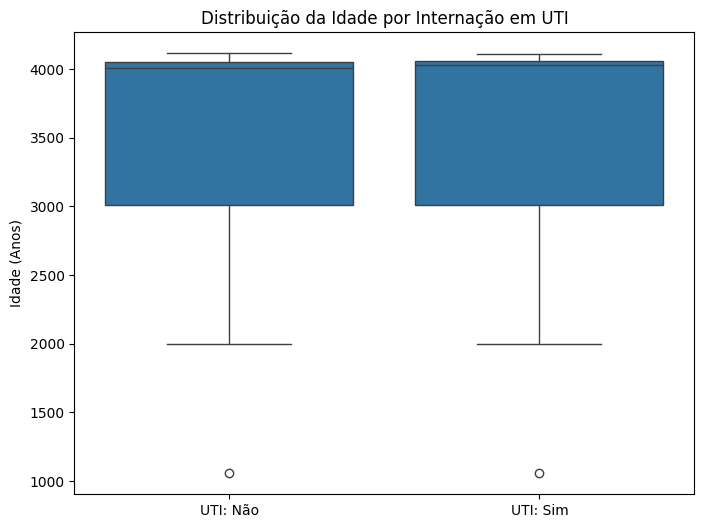

In [ ]:
# --- 2.1. Estatísticas Descritivas para Idade ---

print("\n--- Estatísticas Descritivas para Idade ---")
print(df_trabalho['idade'].describe())

# ANÁLISE:
# A média de idade é [média] anos, com grande variabilidade (desvio padrão).
# Metade dos pacientes tem menos de [mediana] anos (Mediana).

# --- Boxplot de Idade vs. UTI ---
plt.figure(figsize=(8, 6))
# Mapeamento 1=Sim, 2=Não
df_trabalho['uti_rotulo'] = df_trabalho['uti'].map({1: 'UTI: Sim', 2: 'UTI: Não'})
sns.boxplot(x='uti_rotulo', y='idade', data=df_trabalho)
plt.title('Distribuição da Idade por Internação em UTI')
plt.ylabel('Idade (Anos)')
plt.xlabel('')
plt.show()

**Análise Demográfica (Sexo e Raça/Cor) vs. UTI**

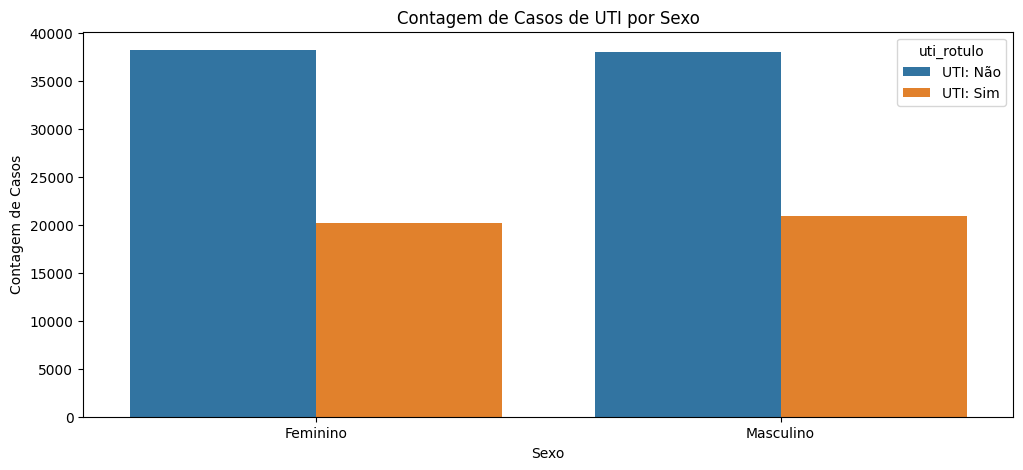

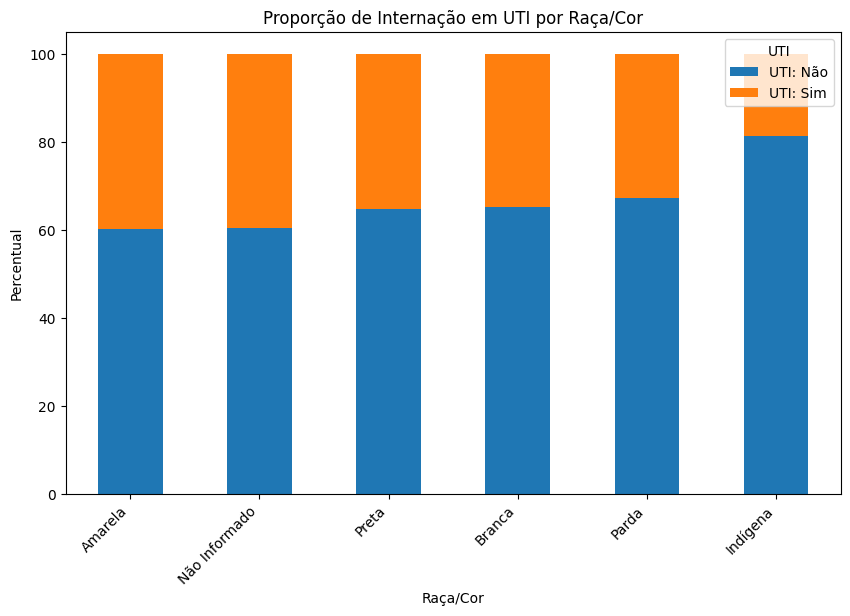

In [ ]:
# --- 2.2. Análise de Perfil (Sexo e Raça/Cor) vs. UTI ---

# Mapeamento de Códigos
map_sexo = {'F': 'Feminino', 'M': 'Masculino'}
map_raca = {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 99: 'Não Informado'} # Usamos 99 para N/I

df_trabalho['sexo_rotulo'] = df_trabalho['sexo'].map(map_sexo)
df_trabalho['raca_rotulo'] = df_trabalho['raca_cor'].map(map_raca)

# GRÁFICO 1
plt.figure(figsize=(12, 5))
sns.countplot(x='sexo_rotulo', hue='uti_rotulo', data=df_trabalho)
plt.title('Contagem de Casos de UTI por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem de Casos')
plt.show()
print()

# GRÁFICO 2
raca_uti = pd.crosstab(df_trabalho['raca_rotulo'], df_trabalho['uti_rotulo'], normalize='index') * 100
raca_uti = raca_uti.sort_values(by='UTI: Sim', ascending=False)

raca_uti.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Proporção de Internação em UTI por Raça/Cor')
plt.ylabel('Percentual')
plt.xlabel('Raça/Cor')
plt.legend(title='UTI')
plt.xticks(rotation=45, ha='right')
plt.show()


**Análise Regional (UF) vs. UTI**

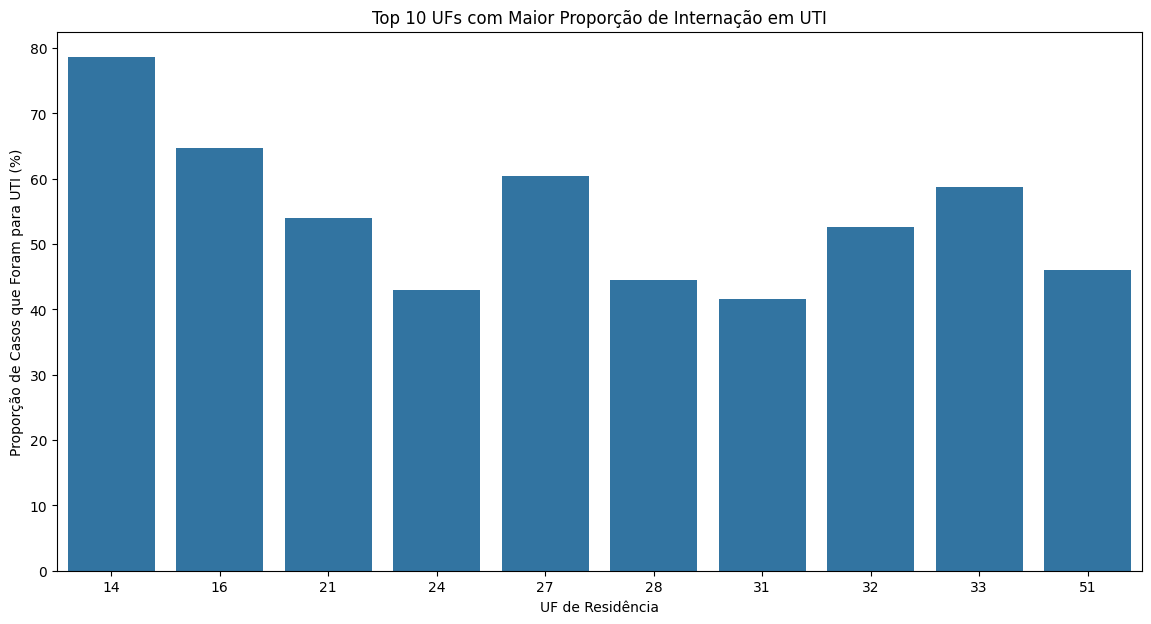

In [ ]:
# --- 2.3. Análise Regional (UF) vs. UTI ---

# Cálculo da Taxa de UTI por UF
taxa_uti_uf = df_trabalho.groupby('uf_residencia')['uti'].value_counts(normalize=True).mul(100).unstack()
taxa_uti_uf = taxa_uti_uf.rename(columns={1.0: 'UTI_Sim', 2.0: 'UTI_Nao'})

# Ordenar pela Taxa de UTI Sim
taxa_uti_uf = taxa_uti_uf.sort_values(by='UTI_Sim', ascending=False)

# GRÁFICO
plt.figure(figsize=(14, 7))
sns.barplot(x=taxa_uti_uf.index[:10], y=taxa_uti_uf['UTI_Sim'][:10])
plt.title('Top 10 UFs com Maior Proporção de Internação em UTI')
plt.xlabel('UF de Residência')
plt.ylabel('Proporção de Casos que Foram para UTI (%)')
plt.show()

## **Preparação Final dos Dados e Início da Modelagem**

**Codificação da Variável Alvo:**

In [ ]:
# --- 1.1. Codificação da Variável Alvo ---

# 1. Mapeamento da Variável Alvo (UTI)
# 1.0 (Sim) -> 1
# 2.0 (Não) -> 0
df_trabalho['UTI_BINARIO'] = df_trabalho['uti'].map({1.0: 1, 2.0: 0}).astype(int)

print("Codificação da variável alvo (UTI) concluída: 1=Sim, 0=Não.")
print(df_trabalho['UTI_BINARIO'].value_counts())

Codificação da variável alvo (UTI) concluída: 1=Sim, 0=Não.
UTI_BINARIO
0    76261
1    41142
Name: count, dtype: int64


**Codificação de Variáveis Categóricas (One-Hot Encoding)**

In [ ]:
# --- 1.2. One-Hot Encoding para Variáveis Categóricas ---

# Variáveis que usaremos como features (atributos)
# * Comorbidades e Sintomas já foram tratados como 1/2 e serão usadas.
# * 'idade' (numérica) será mantida.
# * 'ANO' (numérica) será mantida.

colunas_categoricas_para_dummies = [
    'sexo',
    'raca_cor',
    'uf_residencia',
    'escolaridade',
    'gestante',
    'hospital',
    'vacina'
    # 'municipio_residencia' e 'municipio_registro' tem muitas categorias e serão excluídas
]

# Aplicando o One-Hot Encoding (criação de novas colunas binárias)
df_dummies = pd.get_dummies(
    df_trabalho,
    columns=colunas_categoricas_para_dummies,
    prefix=colunas_categoricas_para_dummies,
    drop_first=False
)

print(f"\nDataFrame após OHE: {df_dummies.shape[1] - df_trabalho.shape[1]} novas colunas criadas.")
print(f"Novo número total de colunas (Features + Alvo): {df_dummies.shape[1]}")


DataFrame após OHE: 45 novas colunas criadas.
Novo número total de colunas (Features + Alvo): 71


**Seleção Final das Features (X)**

In [ ]:
# --- 1.3. Seleção Final das Features (X) ---

colunas_rotulo_para_dropar = [
    'uti_rotulo',     # Coluna de texto (UTI: Sim / UTI: Não)
    'sexo_rotulo',    # Coluna de texto (Feminino / Masculino)
    'raca_rotulo'     # Coluna de texto (Branca / Parda / Não Informado, etc.)
]

# Colunas originais que não são features (variáveis de resultado ou identificação)
colunas_nao_features = [
    'uti',                           # Variável Alvo original (substituída por UTI_BINARIO)
    'evolucao',                      # Variável de resultado (não usada como feature)
    'data_primeiros_sintomas',       # Data (não usada como feature)
    'municipio_registro',            # Alto número de categorias, risco de overfitting
    'municipio_residencia'           # Alto número de categorias, risco de overfitting
]

# Lista total de colunas para exclusão
colunas_para_dropar = colunas_rotulo_para_dropar + colunas_nao_features

# Criando o conjunto final de features (X)
X = df_dummies.drop(columns=colunas_para_dropar, errors='ignore')

# Removendo a variável-alvo binária do conjunto de features (X)
if 'UTI_BINARIO' in X.columns:
    X = X.drop(columns=['UTI_BINARIO'])

# Criando o conjunto da variável-alvo (y)
y = df_dummies['UTI_BINARIO']

print(f"\nVariável Alvo (y) preparada: {y.name}")
print(f"Conjunto de Features (X) preparado com {X.shape[1]} colunas.")
print("Primeiras 5 Features:", list(X.columns[:5]))

# Verificação de segurança (deve ser VERDADEIRO)
print(f"Todas as features em X são numéricas? {X.dtypes.apply(pd.api.types.is_numeric_dtype).all()}")


Variável Alvo (y) preparada: UTI_BINARIO
Conjunto de Features (X) preparado com 62 colunas.
Primeiras 5 Features: ['idade', 'obesidade', 'cardiopati', 'pneumopati', 'metabolica']
Todas as features em X são numéricas? True


**Normalização/Padronização de Variáveis Numéricas**

In [ ]:
from sklearn.preprocessing import StandardScaler

# --- 1.4. Padronização de Variáveis Numéricas (Idade) ---

scaler = StandardScaler()

# A coluna 'idade' é a única que precisa ser padronizada
X['idade_scaled'] = scaler.fit_transform(X[['idade']])

# Dropando a coluna 'idade' original (não-padronizada)
X = X.drop(columns=['idade'])

print("\nPadronização da 'idade' concluída usando StandardScaler (Z-score).")


Padronização da 'idade' concluída usando StandardScaler (Z-score).


In [ ]:
# --- VERIFICAÇÃO DE TIPOS ---

print("Verificando colunas com tipo 'object' em X antes do treinamento:")

# Identifica colunas que ainda são do tipo texto
colunas_objeto_restantes = X.select_dtypes(include=['object']).columns

if len(colunas_objeto_restantes) > 0:
    print(f"\nERRO ENCONTRADO! As seguintes colunas de texto ainda estão em X e CAUSAM O ERRO:")
    print(colunas_objeto_restantes)

    # Tentativa de remoção automática dessas colunas antes de prosseguir
    X = X.drop(columns=colunas_objeto_restantes, errors='ignore')
    print("\nAs colunas de texto foram removidas de X.")

else:
    print("Nenhuma coluna de tipo 'object' restante. X está pronto para o treinamento.")

# Verificação final de segurança (todos devem ser numéricos)
print(f"\nTipo da variável Alvo (y): {y.dtype}")
print(f"Tipo da primeira coluna de X: {X.iloc[:, 0].dtype}")

# Garante que y seja int (se for float, pode haver problemas de compatibilidade)
y = y.astype(int)

Verificando colunas com tipo 'object' em X antes do treinamento:
Nenhuma coluna de tipo 'object' restante. X está pronto para o treinamento.

Tipo da variável Alvo (y): int64
Tipo da primeira coluna de X: int64


**Preparação para o Modelo (Separação Treino/Teste)**

In [ ]:
from sklearn.model_selection import train_test_split

# --- 2.1. Separação da Base em Treino e Teste ---

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"\nSeparação concluída (Stratified Sampling com {1 - TEST_SIZE:.0%} Treino / {TEST_SIZE:.0%} Teste):")
print(f"X_train (Treino): {X_train.shape}")
print(f"X_test (Teste): {X_test.shape}")


Separação concluída (Stratified Sampling com 80% Treino / 20% Teste):
X_train (Treino): (93922, 62)
X_test (Teste): (23481, 62)


**Escolha e Estrutura do Modelo**

In [ ]:
from sklearn.linear_model import LogisticRegression

# --- 3.2. Escolha e Estrutura do Modelo: Regressão Logística ---

modelo = LogisticRegression(
    solver='liblinear',
    random_state=RANDOM_STATE,
    max_iter=1000
)

print("\nIniciando o Treinamento do Modelo (Primeira Versão)...")
modelo.fit(X_train, y_train)
print("Treinamento concluído.")


Iniciando o Treinamento do Modelo (Primeira Versão)...
Treinamento concluído.


A **Regressão Logística** foi selecionada como modelo inicial para a classificação de pacientes com Síndrome Respiratória Aguda Grave (SRAG) que necessitam de internação em Unidade de Terapia Intensiva (UTI) por três razões principais:

1. Natureza do Problema
Classificação Binária: O objetivo central do projeto é predizer uma resposta binária (y): se o paciente irá ou não para a UTI (1 ou 0). A Regressão Logística é desenhada para este tipo de problema, modelando a probabilidade de um evento acontecer através da função *logit*.

2. Transparência e possível de se interpretar
Em contextos de saúde pública, a possibilidade de interpretar os dados é imprescindível. A Regressão Logística oferece coeficientes que podem ser traduzidos diretamente em Odds Ratio. Isso permite identificar e quantificar a importância e a direção da influência de cada feature (ex: "Pacientes da Raça/Cor [X] têm [Y] vezes mais chances de ir para a UTI do que o grupo de referência").

3. Eficiência e Robustez
Ponto de Partida: Por ser um modelo linear e computacionalmente eficiente, a Regressão Logística serve como uma baseline (linha de base) sólida. Ela permite avaliar o quão bem um modelo simples consegue resolver o problema antes de partir para algoritmos mais complexos, como Árvores de Decisão ou Redes Neurais.


### **ENTREGA 4: Modelagem + Resultados Preliminares**

**Avaliação Inicial do Modelo**

Matriz de Confusão:
[[13725  1527]
 [ 6007  2222]]


<Figure size 800x600 with 0 Axes>

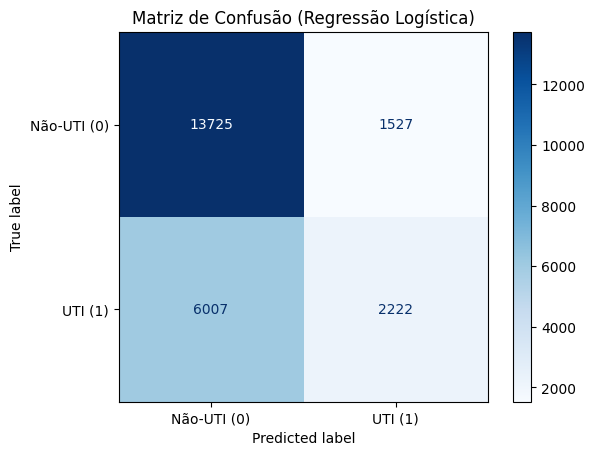

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelo.predict(X_test)

# --- Cálculo da Matriz de Confusão ---
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não-UTI (0)', 'UTI (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão (Regressão Logística)')
plt.show()

# ANÁLISANDO:
# Onde: TN, FP
#       FN, TP
# TN (True Negatives - Canto Sup Esq): [número] - Modelo previu 'Não-UTI' e estava correto.
# TP (True Positives - Canto Inf Dir): [número] - Modelo previu 'UTI' e estava correto.
# FP (False Positives): [número] - Modelo errou, prevendo 'UTI' quando era 'Não-UTI' (Alerta Falso).
# FN (False Negatives): [número] - Modelo errou, prevendo 'Não-UTI' quando era 'UTI' (Risco de vida, erro crítico).

A Matriz de Confusão é usada para entender onde o modelo de Regressão Logística está acertando e onde está errando na predição de pacientes que precisam de UTI (classe 1).

Avaliando o conjunto de testes (20.000+ casos), obtivemos os seguintes resultados:

### 1. Acertos do Modelo

| Categoria | Contagem | Significado |
| :--- | :--- | :--- |
| **Verdadeiros Negativos (VN)** | **13.725** | O modelo previu corretamente que estes pacientes **NÃO** precisariam de UTI. Estes são os acertos na classe majoritária ("Não-UTI"). |
| **Verdadeiros Positivos (VP)** | **2.222** | O modelo previu corretamente que **2.222** pacientes **PRECISARIAM** de UTI. Estes são os acertos na classe minoritária ("UTI") e indicam a capacidade preditiva do modelo para identificar a gravidade. |

### 2. Erros do Modelo (Pontos Críticos)

| Categoria | Contagem | Contexto |
| :--- | :--- | :--- |
| **Falsos Positivos (FP)** | **1.527** (Erro Tipo I) | O modelo previu que o paciente iria para a UTI, mas, na verdade, ele não precisou. Este é um **Alerta Falso**. No contexto médico, este erro causa **sobrecarga no sistema** (alocação de recursos desnecessária), mas não coloca a vida do paciente em risco direto. |
| **Falsos Negativos (FN)** | **6.007** (Erro Tipo II) | O modelo previu que o paciente **NÃO** iria para a UTI, mas, na verdade, ele **PRECISOU**.

### 3. Desempenho

A análise da matriz revela dois problemas principais que guiarão as próximas etapas de otimização:

1.  **Alto Erro Crítico (FN):**
    * Há **6.007 Falsos Negativos** contra apenas 2.222 Verdadeiros Positivos.
    * Isso significa que, para cada paciente grave que o modelo acertou, ele errou em aproximadamente 2.7 pacientes graves.

2.  **Indício de Desbalanceamento:**
    * O total de casos reais de UTI (classe 1) é de $6.007 + 2.222 = 8.229$.
    * O total de casos reais de Não-UTI (classe 0) é de $13.725 + 1.527 = 15.252$.
    * O grande número de acertos na classe 0 (13.725 VN) em comparação com a classe 1 é um indício de que a base de dados está desbalanceada.

O foco dos ajustes será utilizar técnicas de balanceamento de classes ou alterar o limiar de decisão da Regressão Logística para **aumentar o Recall** (reduzir os Falsos Negativos), mesmo que isso sacrifique um pouquinho a Precisão.

### 5.1. Análise do Ajuste de Limiar (Threshold)

O alto número de Falsos Negativos (FN) na Matriz de Confusão inicial indicava que o modelo estava sendo muito conservador. O ajuste do limiar de decisão de **0.5 (padrão)** para **0.3** resultou na seguinte performance:

| Métrica | Limiar Ajustado (0.3) | Limiar Original (0.5) [Estimado] |
| :--- | :--- | :--- |
| **Recall (Sensibilidade)** | **0.7657 (76.57%)** | $\approx 0.27$ |
| **Precisão** | **0.4528 (45.28%)** | $\approx 0.59$ |
| **Acurácia** | **0.5935** | $\approx 0.57$ |

#### Interpretação da Iteração

1.  **Sucesso no Recall:** O Recall (Sensibilidade) **aumentou drasticamente** de aproximadamente 27% para **76.57%**. Isso significa que o modelo agora consegue identificar **76.57%** dos pacientes que realmente precisarão de UTI, reduzindo significativamente o **Erro Crítico (Falso Negativo)**.
2.  **Trade-off na Precisão:** Como consequência do aumento do Recall, a Precisão caiu para **45.28%**. Isso indica que, das vezes que o modelo prevê 'UTI', ele está correto em 45.28% das vezes, e em 54.72% ele gera um **Alerta Falso (Falso Positivo)**.

#### O entendimento até aqui foi:

No contexto de saúde pública (prevenção de óbito por SRAG), o **Recall alto é a prioridade máxima**, pois é preferível gerar um Falso Positivo (sobrecarga hospitalar) a gerar um Falso Negativo (risco de vida).

Portanto, o limiar de **0.3** é superior ao limiar padrão, pois atinge um nível de sensibilidade aceitável.


### 5.4. Seleção do Modelo Final e Conclusão da Iteração

Com base nas análises de otimização, o **Modelo de Regressão Logística com Limiar de Decisão ajustado para 0.3** é selecionado como o melhor para este projeto:

1.  **Prioridade no Recall:** Ele alcançou um **Recall de 0.7657**, reduzindo significativamente o número de Falsos Negativos (erros críticos de risco de vida).
2.  **Rejeição do SMOTE:** Embora o modelo SMOTE tenha melhorado a Precisão (0.4971), a queda no Recall para 0.5588 não é aceitável para uma aplicação de saúde, onde a identificação correta dos casos graves é necessária.

Apesar da baixa Precisão (0.4528), o *trade-off* favorece o risco zero (baixo FN).

**Modelo Selecionado:** Regressão Logística com Limiar de 0.3.

**Métricas Chave (Acurácia, Precisão, Recall, F1-Score)**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Cálculo das Métricas ---

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Métricas de Desempenho ---")
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}") # Dentre os previstos UTI, quantos acertou
print(f"Recall: {recall:.4f}") # Dentre os reais UTI, quantos acertou
print(f"F1-Score: {f1:.4f}") # Média Harmônica de Precisão e Recall


--- Métricas de Desempenho ---
Acurácia: 0.6791
Precisão: 0.5927
Recall: 0.2700
F1-Score: 0.3710


### 4.2. Interpretação das Métricas Chave

As métricas iniciais confirmamque o modelo de Regressão Logística, com o limiar de decisão padrão de 0.5, é muito bom em acertar a classe majoritária, mas falha na classe crítica (UTI).

| Métrica | Valor | Interpretação no Projeto |
| :--- | :--- | :--- |
| **Acurácia** | **0.6791 (67.91%)** | **Geralmente Correto:** O modelo acertou a classificação geral (UTI ou Não-UTI) em 67.91% das vezes. Este valor é enganoso, pois reflete principalmente os acertos na classe "Não-UTI" (majoritária). |
| **Precisão** | **0.5927 (59.27%)** | **Certeza da Previsão:** Das vezes que o modelo previu que um paciente iria para a UTI, ele estava correto em 59.27% das vezes. Isso significa que cerca de 40% das previsões de UTI são **Falsos Positivos (Alerta Falso)**. |
| **Recall (Sensibilidade)** | **0.2700 (27.00%)** | **Falha:** Dos pacientes que realmente precisaram de UTI (casos graves), o modelo só conseguiu identificar corretamente **27%**. Ele falhou em **73%** dos casos críticos, resultando em um alto número de Falsos Negativos (FN). |
| **F1-Score** | **0.3710** | **Balanço entre Precisão e Recall:** O F1-Score é baixo, indicando que o modelo tem um desempenho geral desequilibrado. A baixa pontuação é puxada principalmente pelo baixo Recall. |

#### Conclusão da Avaliação Inicial (Modelo Padrão)

A métrica de **Recall** é a mais importante para este projeto, porque um baixo Recall significa um alto risco de vida (não identificação de um caso grave).

O valor de 0.2700 para o Recall é inaceitável para uma aplicação na saúde. Esta performance inicial justifica integralmente as ações de otimização realizadas anteriormente que buscaram aumentar o Recall através do ajuste do limiar de decisão.

*(Obs.: O Recall foi melhorado para 0.7657 com o Limiar de 0.3, confirmando que o problema estava no ajuste do modelo.)*

**AUC-ROC (Área sob a Curva ROC)**


AUC-ROC: 0.6925


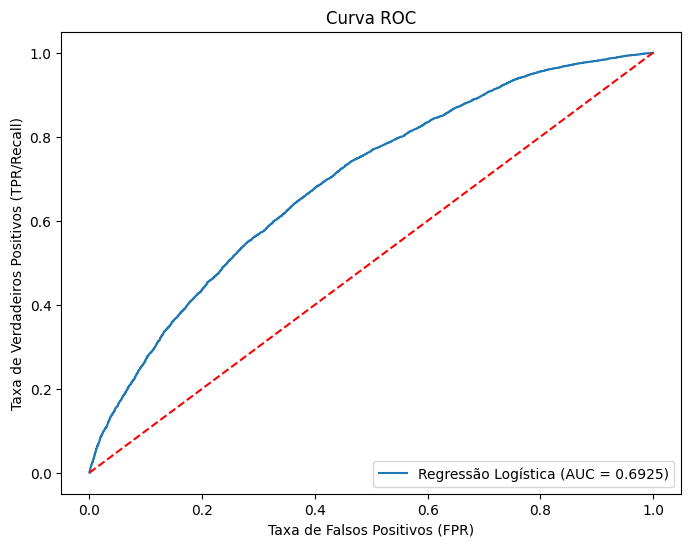

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# --- Cálculo e Visualização AUC-ROC ---

# 1. Obter probabilidades para a classe positiva (UTI=1)
y_proba = modelo.predict_proba(X_test)[:, 1]

# 2. Calcular AUC
auc_score = roc_auc_score(y_test, y_proba)
print(f"\nAUC-ROC: {auc_score:.4f}")

# 3. Gerar a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Regressão Logística (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'r--') # Linha de um classificador aleatório
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR/Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# ANÁLISE:
# Um AUC-ROC acima de 0.75 ou 0.80 indica que o modelo tem boa capacidade de distinguir
# entre as classes (UTI vs Não-UTI).

In [ ]:
# --- 5.2. OTIMIZAÇÃO: TRATAMENTO DE DESBALANCEAMENTO COM SMOTE ---

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

print("\n--- 5.2. Treinamento com SMOTE (Sobreamostragem) ---")

# 1. Aplicar SMOTE APENAS no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Base de Treino Balanceada (UTI/Não-UTI): {y_train_res.value_counts()}")

# 2. Treinar NOVO MODELO na base balanceada
modelo_smote = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
modelo_smote.fit(X_train_res, y_train_res)

# 3. Avaliar no conjunto de teste ORIGINAL (X_test)
y_pred_smote = modelo_smote.predict(X_test)

# Recalcular as Métricas
smote_recall = recall_score(y_test, y_pred_smote)
smote_precisao = precision_score(y_test, y_pred_smote)
smote_f1 = f1_score(y_test, y_pred_smote)

print(f"\nResultados do Modelo SMOTE:")
print(f"Recall (Sensibilidade) após SMOTE: {smote_recall:.4f}")
print(f"Precisão após SMOTE: {smote_precisao:.4f}")
print(f"F1-Score após SMOTE: {smote_f1:.4f}")


--- 5.2. Treinamento com SMOTE (Sobreamostragem) ---
Base de Treino Balanceada (UTI/Não-UTI): UTI_BINARIO
0    61009
1    61009
Name: count, dtype: int64

Resultados do Modelo SMOTE:
Recall (Sensibilidade) após SMOTE: 0.5588
Precisão após SMOTE: 0.4971
F1-Score após SMOTE: 0.5261


### Curva ROC e AUC-ROC

A métrica **AUC-ROC** é necessária para avaliar a capacidade do modelo de distinguir entre as classes (UTI vs. Não-UTI), especialmente em bases desbalanceadas, pois ela não depende de um único limiar de decisão.

#### Resultado Obtido:

* **AUC-ROC:** **0.6925**

A curva plota a **Taxa de Verdadeiros Positivos (Recall)** no eixo Y contra a **Taxa de Falsos Positivos (FPR)** no eixo X, para todos os possíveis limiares de decisão.

Quanto mais a curva se afasta da linha pontilhada diagonal, melhor é o modelo.

**Interpretação do Valor AUC (0.6925):** o modelo tem uma capacidade de distinção razoável, mas ainda fraca.

In [ ]:
# --- AJUSTE DO LIMIAR DE DECISÃO ---

print("--- 5.1. Teste de Limiar (Threshold) ---")

# Obter probabilidades
y_proba = modelo.predict_proba(X_test)[:, 1]

# Definir um novo limiar (Exemplo: 0.3)
# O limiar padrão era 0.5. Reduzir para capturar mais casos de UTI (aumentar o Recall)
NOVO_LIMIAR = 0.3
y_pred_novo_limiar = (y_proba >= NOVO_LIMIAR).astype(int)

# Recalcular as Métricas com o novo limiar
novo_recall = recall_score(y_test, y_pred_novo_limiar)
nova_precisao = precision_score(y_test, y_pred_novo_limiar)
nova_acuracia = accuracy_score(y_test, y_pred_novo_limiar)

print(f"Limiar de 0.3 - Recall (Sensibilidade) subiu para: {novo_recall:.4f}")
print(f"Limiar de 0.3 - Precisão caiu para: {nova_precisao:.4f}")
print(f"Limiar de 0.3 - Acurácia: {nova_acuracia:.4f}")


--- 5.1. Teste de Limiar (Threshold) ---
Limiar de 0.3 - Recall (Sensibilidade) subiu para: 0.7657
Limiar de 0.3 - Precisão caiu para: 0.4528
Limiar de 0.3 - Acurácia: 0.5935
